In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('data/car.csv', sep=',')
df

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
3,25-39,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,9:17:1,3
4,10-24,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,2:2:2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,10-24,131.491,alive,airbag,belted,0,m,28,2002,1997,deploy,driver,1,2:106:1,0
17561,10-24,281.693,alive,none,belted,1,f,39,1998,1987,unavail,driver,0,12:118:1,1
17562,10-24,419.418,alive,airbag,belted,1,f,29,1997,1988,deploy,driver,1,9:37:2,3
17563,40-54,9.815,alive,none,none,1,f,22,2000,1990,unavail,driver,0,49:112:2,3


In [6]:
df_driver = df[df['occRole'] == 'driver']
df_driver.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity
0,55+,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,45:150:1,3
1,25-39,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,76:40:1,3
2,55+,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,11:184:1,3
5,10-24,720.453,alive,airbag,belted,1,m,47,1998,1997,nodeploy,driver,0,11:32:1,0
6,10-24,1.000,alive,airbag,belted,1,m,17,2002,1991,deploy,driver,1,50:3:1,2


In [7]:
df.groupby('sex')['weight'].mean()

sex
f    493.105541
m    428.499518
Name: weight, dtype: float64

In [8]:
df.groupby('sex')['injSeverity'].mean()

sex
f    1.764463
m    1.667773
Name: injSeverity, dtype: float64

In [9]:
df_driver.groupby('sex')['injSeverity'].mean()

sex
f    1.762640
m    1.676524
Name: injSeverity, dtype: float64

In [10]:
df_driver.groupby('dvcat')['injSeverity'].mean()


dvcat
1-9km/h    0.897297
10-24      1.279923
25-39      1.934662
40-54      2.505473
55+        3.034826
Name: injSeverity, dtype: float64

In [13]:
df_driver.groupby('sex')

In [11]:
df_driver['seatbelt_2'] = df_driver['seatbelt'].replace(['belted', 'none'],[1, 0])

C:\Users\mareis\AppData\Local\Temp\ipykernel_29044\3476102689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_driver['seatbelt_2'] = df_driver['seatbelt'].replace(['belted', 'none'],[1, 0])
C:\Users\mareis\AppData\Local\Temp\ipykernel_29044\3476102689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_driver['seatbelt_2'] = df_driver['seatbelt'].replace(['belted', 'none'],[1, 0])


In [12]:
df_driver.groupby(['sex'])['seatbelt_2'].mean()

sex
f    0.786277
m    0.673022
Name: seatbelt_2, dtype: float64

In [54]:
df_driver[df_driver['injSeverity'] == 5]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,caseid,injSeverity,seatbelt_2
200,10-24,86.264,alive,airbag,none,1,f,42,2002,1995,deploy,driver,1,6:66:2,5,0
365,10-24,402.377,alive,none,belted,1,m,19,1997,1991,unavail,driver,0,8:167:1,5,1
1620,10-24,31.851,alive,none,none,0,f,97,2000,1988,unavail,driver,0,49:156:1,5,0
1842,10-24,111.649,alive,airbag,belted,1,m,41,2000,2000,deploy,driver,1,8:107:2,5,1
2117,40-54,388.489,alive,none,none,1,m,36,1999,1971,unavail,driver,0,76:88:2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15841,10-24,213.767,alive,none,none,1,f,28,1997,1989,unavail,driver,0,8:144:2,5,0
16042,10-24,568.234,alive,none,belted,0,f,33,2002,1991,unavail,driver,0,5:21:2,5,1
16378,25-39,109.182,alive,none,belted,0,m,46,1998,1986,unavail,driver,0,2:38:2,5,1
16749,40-54,9.026,alive,none,belted,0,m,20,2002,1991,unavail,driver,0,74:158:2,5,1


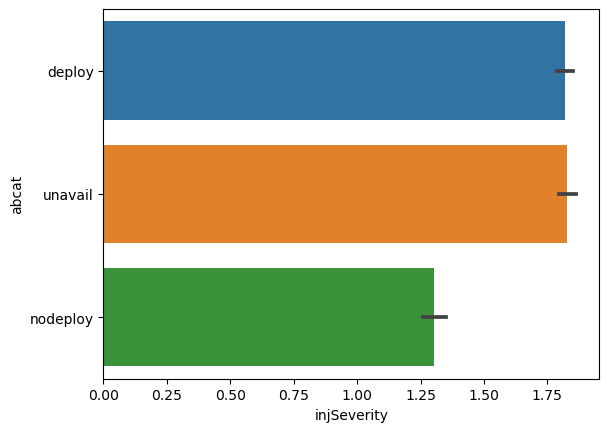

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='injSeverity', y='abcat', data=df_driver)
plt.show()

<AxesSubplot:xlabel='yearVeh', ylabel='injSeverity'>

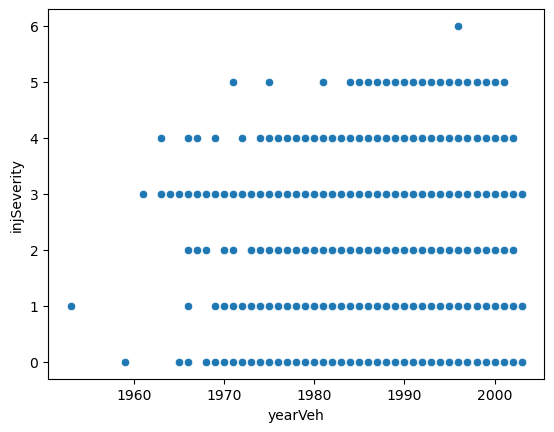

In [68]:
sns.scatterplot(x='yearVeh', y='injSeverity', data=df_driver)

In [75]:
ant_coll = df_driver['yearacc'].value_counts()
ant_coll

#sns.lineplot(x='yearacc', y='injSeverity', data=df_driver)

2002    2522
1999    2370
2000    2319
1998    2302
2001    2182
1997    2107
Name: yearacc, dtype: int64

<AxesSubplot:ylabel='yearacc'>

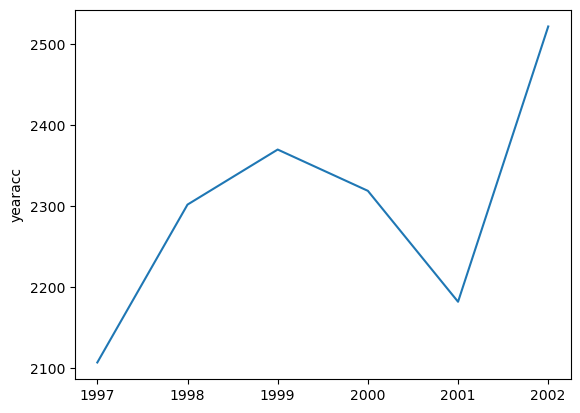

In [76]:
sns.lineplot(x=ant_coll.index, y=ant_coll)

In [77]:
abs(-2)

2

In [5]:
a = 3
S = 0
n = 0

while a <= 33:
    n = n + 1
    S = S + a
    a = a + 5
    
print(n)
print(S)  

7
126
